In [1]:
from keras.models import load_model
model = load_model('C:/Users/ASUS/.keras/SaveModel/my_data_cave_1.h5')#my_data_cave_1.h5    cifarCnnModel.h5
model.summary() 

D:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [2]:
img_path = 'E:/北京交通大学/毕业论文/自建数据集/裁剪后/cave17.jpg'#256 288
# 我们将图像预处理成4维张量
from keras.preprocessing import image
import numpy as np
# 从路径读取图片，并把图片大小调整为（150,150）
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# 按以下方式预处理：
img_tensor /= 255.

# 打印它的shape： (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


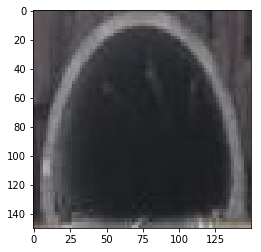

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [4]:
# 从输入张量和输出张量列表实例化模型
from keras import models

# 提取前8层的输出：
layer_outputs = [layer.output for layer in model.layers[:8]]
# 给定模型输入，创建将返回这些输出的模型：
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [5]:
# 这将返回5个Numpy数组的列表：每个层产生一个激活数组
activations = activation_model.predict(img_tensor)

In [6]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


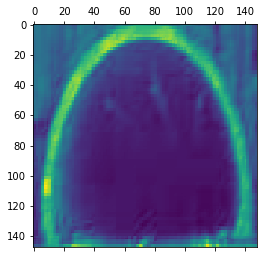

In [7]:
import matplotlib.pyplot as plt
# 可视化第一层激活的第四个通道
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

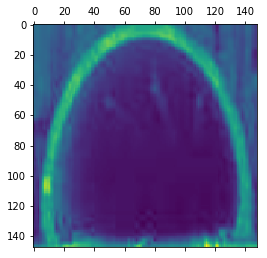

In [8]:
# 可视化第七个通道
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')
plt.show()

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


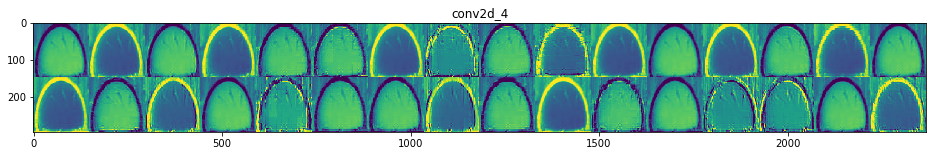

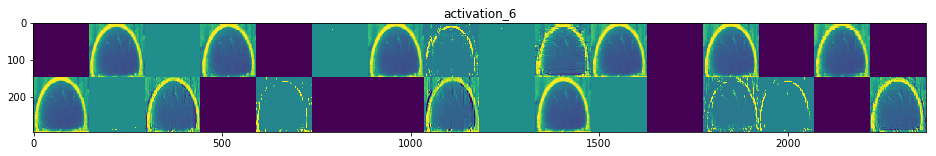

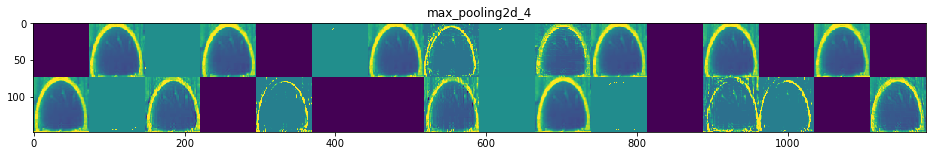

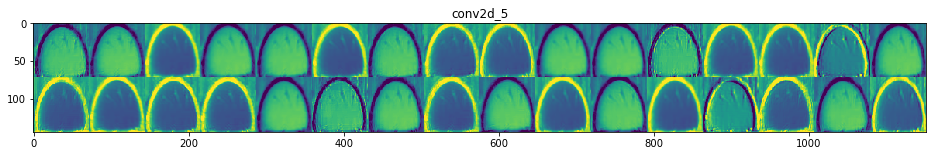

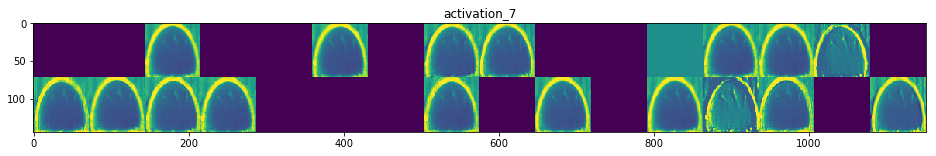

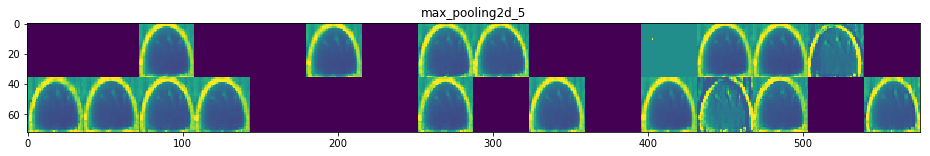

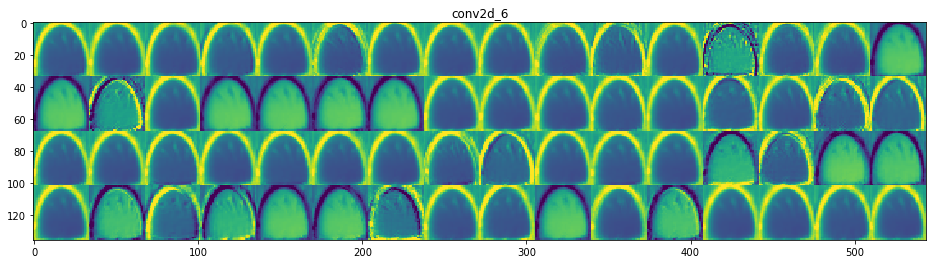

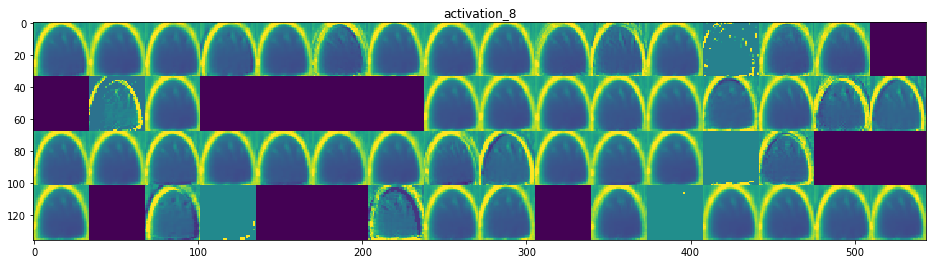

In [9]:
import keras

# 读取各个层的名称
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 可视化特征图
for layer_name, layer_activation in zip(layer_names, activations):
    # 这是特征图的特征数量
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # 平铺激活通道
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 我们将每个过滤器平铺到这个大的网格中
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 在网格显示出来
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
#plt.savefig("E:/北京交通大学/毕业论文/训练特征提取/新网络/精选扩充-14.png")
plt.show()